**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
***
**<font size=6 color=green> LCO: Riešenie úloh LP pomocou SciPy a GEKKO </font>**  

In [8]:
# import kniznice NumPy pre pracu s poliami (maticami) 
import numpy as np 
# import modulu linprog z kniznice SciPy pre riešenie uloh linearneho programovania 
from scipy.optimize import linprog 
# kniznica pre meranie (vypoctoveho) casu 
import time 

**<font color=red> UPOZORNENIE: Všimnite si na nasledujúcom obrázku, v akej forme je potrebné zadať úlohu LP, ak ju chcete riešiť pomocou SciPy knižnice! </font>**

[tvar úlohy LP v SciPy](https://drive.google.com/file/d/1rTTTDcscp0TmMmBW1ydXhy_HcN0qjFGT/view?usp=sharing)

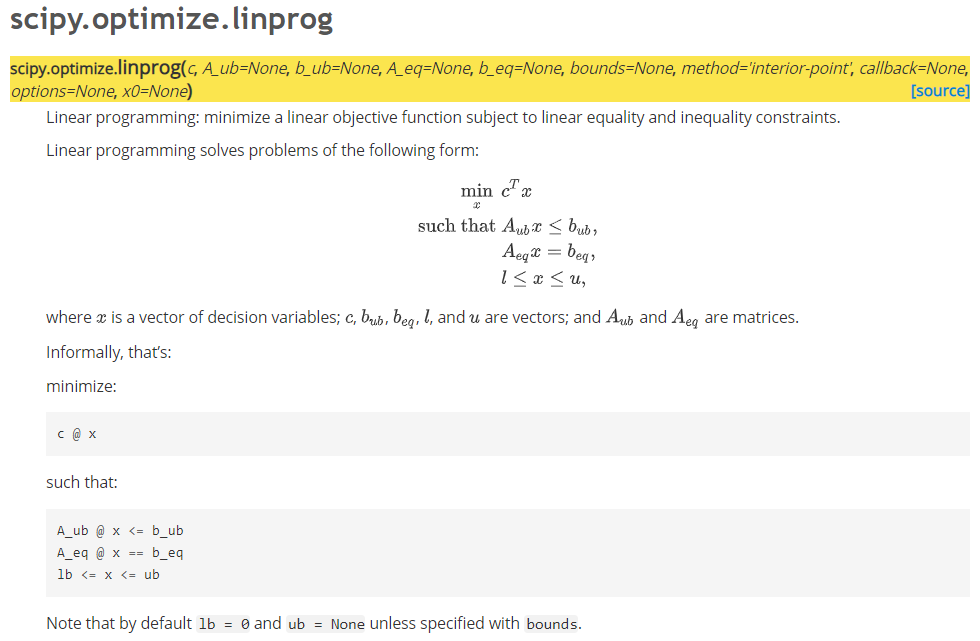

---

### <font color=brown> Príklad 1 </font>
 
Vyriešte úlohu LP: 

\begin{align}
10x_1 + 15x_2 + 25x_3 & \rightarrow \mathrm{min} \\
x_1 + x_2 + x_3 & \ge 1000 \\ 
x_1 - 2x_2 & \ge 0 \\ 
x_3 & \ge 340 \\
        x_{1} & \ge 0 \\ 
        x_{2} & \ge 0. 
\end{align}

<ins> Riešenie: </ins> 


In [2]:
# zavedenie matic a vektorov ulohy LP 
# vsimnite si, ze matica A i vektor b su prenasobene -1 tak, aby uloha bola v pozadovanom tvare uvedenom na zaciatku dokumentu 
A = np.array([[-1, -1, -1], [-1,2, 0], [0, 0, -1]])
print(A) # vypis matice A
b = np.array([-1000, 0, -340])
print(b) # vypis vektora b 
c = np.array([10,15,25]) 
print(c) # vypis vektora c 

[[-1 -1 -1]
 [-1  2  0]
 [ 0  0 -1]]
[-1000     0  -340]
[10 15 25]


In [3]:
# vyriesenie ulohy LP 
# priradenie vektora koeficientov ucelovej funkcie, priradenie matice ohraniceni 
# priradenie vektora pravych stran a podmienka nezapornosti vybranych (vsetkych) premennych 
# vsimnite si, ze parameter method='simplex', je mozne pouzit aj ine alternativy resp. metody riesenia ulohy LP 
# konkretne method='revised simplex' alebo method='interior-point' (numericke riesenie)
res = linprog(c=c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')

In [4]:
# vypis riesenia (ak existuje) 
print('Optimal value:', res.fun, '\nX:', res.x)

Optimal value: 15100.0 
X: [660.   0. 340.]


In [5]:
# dalsie vypisy stavu riesenia 
print(res.status) # cele cislo predstavujuce stav ukoncenia algoritmu - pozrite dokumentaciu 
print(res.success) # True - ked sa algoritmu podari najst optimalne riesenie 
print(res.nit) # pocet iteracii 

0
True
3


In [9]:
# meranie vypoctoveho casu 
start_time = time.time()
res = linprog(c=c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.009878158569335938 seconds ---


In [6]:
# numericke riesenie pomocou metody vnutorneho bodu (podobne ako balik CVXPY)
res2 = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='interior-point')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [7]:
# vypis riesenia 
print('Optimal value:', res2.fun, '\nX:', res2.x)

Optimal value: 15099.99996140322 
X: [6.59999996e+02 1.00009440e-07 3.40000000e+02]


In [10]:
# meranie vypoctoveho casu 
start_time = time.time()
res2 = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='interior-point')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.014137744903564453 seconds ---


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


---

### <font color=brown> Príklad 2 </font> 

Vyriešte úlohu LP: 

\begin{align}
  x_1 + 2x_2 & \rightarrow \mathrm{max} \\
 2x_1 +  x_2 & \le 20 \\ 
-4x_1 + 5x_2 & \le 10 \\ 
 -x_1 + 2x_2 & \ge -2 \\ 
 -x_1 + 5x_2 & = 15 \\ 
     x_{1,2} & \ge 0.
\end{align}

<ins> Riešenie: </ins> 


In [11]:
print("====== Vectors and matrices ======")
c = [-1, -2]
print(c)
A_ineq = [[2, 1], 
          [-4, 5], 
          [1, -2]]
print(A_ineq)
A_eq = [[-1,5]]
print(A_eq)
b_ineq = [20, 
          10, 
          2] 
print(b_ineq)
b_eq = [15] 
print(b_eq)
x1_bounds = (0, None) # ohranicenie premennej x1 
print(x1_bounds)
x2_bounds = (0, None) # ohranicenie premennej x2 
print(x2_bounds)
print("============= RESULTS =============")
res = linprog(c=c, A_ub=A_ineq, A_eq=A_eq, b_ub=b_ineq, b_eq=b_eq, bounds=[x1_bounds, x2_bounds], method='simplex') 
print(res)

====== Vectors and matrices ======
[-1, -2]
[[2, 1], [-4, 5], [1, -2]]
[[-1, 5]]
[20, 10, 2]
[15]
(0, None)
(0, None)
============= RESULTS =============
     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])


---

### <font color=brown> Príklad 3 </font> 

Firma vyrábajúca športové potreby má vo svojom výrobnom programe aj výrobu dvoch typov
baseballových rukavíc, štandardnú rukavicu pre hráčov v poli a záchytnú rukavicu pre zachytenie
neodrazenej lopty. Firma má k dispozícii 900 hodín v oddelení na strihanie a zošívanie, 300 hodín
v oddelení na konečnú úpravu, a 100 hodín v oddelení pre balenie a expedovanie. Časové normy
pre výrobu každého typu rukavíc ako aj jednotkový zisk sú dané v nasledujúcej tabuľke.

[tabuľka](https://drive.google.com/file/d/1VgVXQp9REy7arqBhck35Z2HDgiX7-t0h/view?usp=sharing)

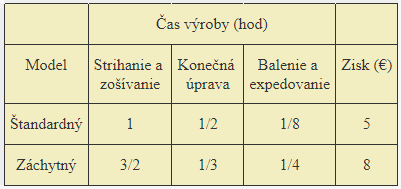

Zostavte úlohu LP, ktorej vyriešenie umožní maximalizovať zisk firmy. Následne úlohu vyriešte simplexovou metódou s využitím balíka _SciPy_. 

<ins> Riešenie: </ins> 

In [ ]:
# optimalne riesenie 
# hodnota ucelovej funkcie: 3700 
# hodnoty premennych: [500, 150] 

--- 

---

### <font color=brown> Príklad 4 </font> 

Vyriešte úlohu LP: 

[zadanie](https://drive.google.com/file/d/1BxdO_gV8MH2IQZZklFP7R_n8nQ2nppy1/view?usp=sharing)

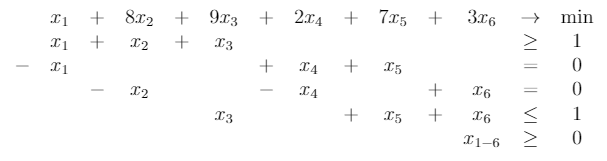

<ins> Riešenie: </ins> 

In [ ]:
# optimalne riesenie 
# hodnota ucelovej funkcie: 6  
# hodnoty premennych: [1, 0, 0, 1, 0, 1]

--- 

--- 

### <font color=brown> Načítanie tabuľky z MS Excel do formátu NumPy poľa </font>   

In [12]:
# pripojenie Google disku (kvoli datam, ktore z neho chceme nacitat) 
# je potrebne overit a potvrdit, ze sa pripajate cez svoj Google ucet 
# spustite bunku s kodom 
# klinite na vygenerovany odkaz 
# skopirujte vygenerovany link z odkazu do bunky v Jupyter notebooku 
# potvrdte (stlacte Enter) 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# nacitanie kniznice Pandas pre efektivnu pracu s datami 
import pandas as pd

In [14]:
# nacitanie ohraniceni (matica A spolu s vektorom b) z Prikladu 1 zo suboru '.xlsx' 
# pozor! prvy parameter je cesta k excelovskemu suboru umiestnenemu na Vasom Google Disku
Ab = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ab_Pr1.xlsx', header=None)
print(Ab) # vypis nacitanej matice (tabulky); vrati aj indexy riadkov/stlpcov; Python indexuje od 0 !!!! 
print(Ab.shape) # vypis dimenzie nacitanych dat 

   0  1  2     3
0 -1 -1 -1 -1000
1 -1  2  0     0
2  0  0 -1  -340
(3, 4)


In [15]:
# nacitane data prevedieme na NumPy pole, aby sme ich nasledne mohli pouzit pri zostavovani ulohy LP pomocou SciPy 
Ab_np = np.array(Ab) 
print(Ab_np)

[[   -1    -1    -1 -1000]
 [   -1     2     0     0]
 [    0     0    -1  -340]]


In [16]:
print(Ab_np[0,:]) # vypis nulteho riadka 
print(Ab_np[1,:]) # vypis prveho riadka 
print(Ab_np[:,3]) # vypis posledneho stlpca 

[   -1    -1    -1 -1000]
[-1  2  0  0]
[-1000     0  -340]


In [17]:
c = np.array([10,15,25]) # vektor koeficientov ucelovej funkcie z Prikladu 1 
print(c) # vypis vektora c 
A = Ab_np[:,0:3] 
print(A) # vypis matice A 
b = Ab_np[:,3]
print(b) # vypis vektora b 
res = linprog(c=c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex') # riesenie ulohy LP 
print('Optimal value:', res.fun, '\nX:', res.x) # vypis riesenia (ak existuje) 

[10 15 25]
[[-1 -1 -1]
 [-1  2  0]
 [ 0  0 -1]]
[-1000     0  -340]
Optimal value: 15100.0 
X: [660.   0. 340.]


In [18]:
# nacitavanie dat z '.csv' suboru; niekedy je potrebne skusit viacero typov oddelovacov ako napr. ',' alebo ';' alebo '\t' ... 
# nacitanie ohraniceni (matica A spolu s vektorom b) z Prikladu 1 zo suboru '.csv'
# Ab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ab_Pr1.csv', sep=';', header=None) # nacitanie s vyuzitim balika Pandas; nasledne je potrebna konverzia na numpy pole  
Ab = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Ab_Pr1.csv', delimiter = ";") # nacitanie priamo s vyuzitim balika NumPy
print(Ab) # vypis nacitanej matice (tabulky) 
print(Ab.shape) # vypis dimenzie nacitanych dat 

[[   -1.    -1.    -1. -1000.]
 [   -1.     2.     0.     0.]
 [    0.     0.    -1.  -340.]]
(3, 4)


--- 

--- 

### <font color=brown> Riešenie úlohy CLP pomocou balíka GEKKO </font> 

In [19]:
# instalacia balika gekko 
!pip install gekko

     |████████████████████████████████| 12.4 MB 5.2 MB/s 


In [20]:
# nacitanie balika gekko resp. modulu GEKKO z tohto balika 
from gekko import GEKKO 

#### Príklad 5

Vyriešte úlohu CLP: 

\begin{align}
   y & \rightarrow \mathrm{max} \\
 -x + y & \le 1 \\ 
3x + 2y & \le 12 \\ 
2x + 3y & \le 12 \\  
     x,y & \ge 0 \\ 
     x,y & \in \mathbb{Z}.
\end{align}

<ins> Riešenie: </ins> 

In [21]:
# riesenie ulohy CLP (priame zadavanie ohraniceni)
m = GEKKO()
x,y = m.Array(m.Var,2,integer=True,lb=0)
m.Maximize(y)
m.Equations([-x+y<=1,
             3*x+2*y<=12,
             2*x+3*y<=12])
m.options.SOLVER = 1
res = m.solve() 
print('Objective: ', -m.options.OBJFCNVAL)
print('x: ', x.value[0])
print('y: ', y.value[0])

apm 34.121.84.220_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              5
 Number of total equations: -            3
 Number of slack variables: -            3
 ---------------------------------------
 Degrees of freedom       :             -1
 
 * Warning: DOF <= 0
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.00 NLPi:    3 Dpth:    0 Lvs:    3 Obj: -2.80E+00 Gap:       NaN
Iter:     2 I: 

In [22]:
# maticova forma ulohy CLP 
m = GEKKO(remote=False)
c = [0,1]
A = [[-1,1],[3,2],[2,3]]
b = [1,12,12]
z = m.Array(m.Var,2,integer=True,lb=0)
m.qobj(c,x=z,otype='max')
m.axb(A,b,x=z,etype='<=')
m.options.SOLVER = 1
m.solve()
print('Objective: ', -m.options.OBJFCNVAL)
print('x: ', z[0].value[0])
print('y: ', z[1].value[0])

A
[[-1.  1.]
 [ 3.  2.]
 [ 2.  3.]]
b
[ 1. 12. 12.]
 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:              2
 Number of total equations: -            3
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             -1
 
 * Warning: DOF <= 0
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.00 NLPi:    4 Dpth:    0 Lvs:    3 Obj: -2.80E+00 Gap:       NaN
It

In [ ]:
# necelociselne optimalne riesenie pre porovnanie 
m = GEKKO(remote=False)
c = [0,1]
A = [[-1,1],[3,2],[2,3]]
b = [1,12,12]
z = m.Array(m.Var,2,integer=False,lb=0)
m.qobj(c,x=z,otype='max')
m.axb(A,b,x=z,etype='<=')
m.options.SOLVER = 1
m.solve()
print('Objective: ', -m.options.OBJFCNVAL)
print('x: ', z[0].value[0])
print('y: ', z[1].value[0])

A
[[-1.  1.]
 [ 3.  2.]
 [ 2.  3.]]
b
[ 1. 12. 12.]
 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:              2
 Number of total equations: -            3
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             -1
 
 * Warning: DOF <= 0
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0 -1.00000E+00  1.00000E+00
    1 -2.00000E+00  0.00000E+0

***
<a id=zdroje></a>
# <font color=brown> Použité zdroje</font>

* [Dokumentácia 1 k SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html). 


* [Dokumentácia 2 k SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog).  


* [Príklady použitia - SciPy](https://realpython.com/linear-programming-python/). 


* [Dokumentácia ku GEKKO](https://gekko.readthedocs.io/en/latest/). 


* [Príklady použitia - GEKKO](https://apmonitor.com/wiki/index.php/Main/IntegerProgramming). 